## Loading resting epochs

In [1]:
import pickle
import os
import numpy as np
import matplotlib.pyplot as plt
import mne

data_dir = "/Users/martin.iniguez/Desktop/master-thesis/opm-thesis/data/resting_epochs/"
file = data_dir + "all_data_all_epochs.pkl"
all_epochs = pickle.load(open(file, "rb")).pick(picks="meg", exclude="bads")
all_epochs = all_epochs.decimate(2)

In [2]:
fmin = 8
fmax = 60
freqs = np.arange(fmin, fmax + 1, 3)
n_cycles = freqs / 2  # different number of cycle per frequency

if os.path.exists(data_dir + "all_epochs_tfr.pkl"):
    with open(data_dir + "all_epochs_tfr.pkl", "rb") as f:
        power = pickle.load(f)
else:

    power = mne.time_frequency.tfr_morlet(
            all_epochs,
            freqs=freqs,
            n_cycles=n_cycles,
            n_jobs=1,
            return_itc=False,
            decim=3,
        )
    with open(data_dir + "all_epochs_tfr.pkl", "wb") as f:
        pickle.dump(power, f)

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Applying baseline correction (mode: logratio)


Text(0.5, 1.0, 'TFR of resting condition')

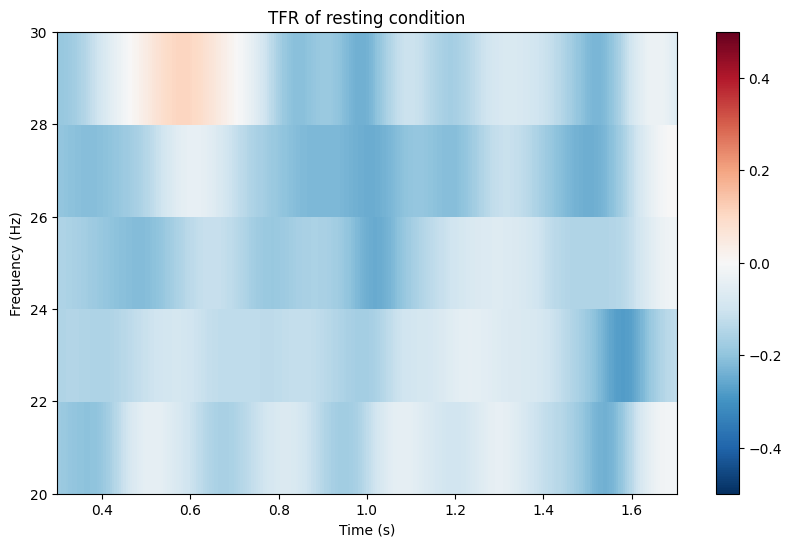

In [16]:
center_channel = "LQ[X]"
idx_channel = all_epochs.ch_names.index(center_channel)

fig, axes = plt.subplots(1, 1, figsize=(10, 6))

# Plot the 5 different digits in a subplot horziontally
power.plot(
    [idx_channel],
    mode="logratio",
    baseline=(0, 0.3),
    tmin=0.3,
    tmax=1.7,
    axes=axes,
    show=False,
    vmin=-0.5,
    vmax=0.5,
)
axes.set_title("TFR of resting condition")

In [14]:
fmin = 21
fmax = 30
freqs = np.arange(fmin, fmax + 1, 2)
n_cycles = freqs / 2  # different number of cycle per frequency

if os.path.exists(data_dir + "all_epochs_tfr_beta.pkl"):
    with open(data_dir + "all_epochs_tfr_beta", "rb") as f:
        power = pickle.load(f)
else:
    power = mne.time_frequency.tfr_morlet(
        all_epochs,
        freqs=freqs,
        n_cycles=n_cycles,
        n_jobs=1,
        return_itc=False,
        decim=3,
    )
    with open(data_dir + "all_epochs_tfr_beta.pkl", "wb") as f:
        pickle.dump(power, f)

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Applying baseline correction (mode: logratio)


Text(0.5, 1.0, 'TFR of resting condition')

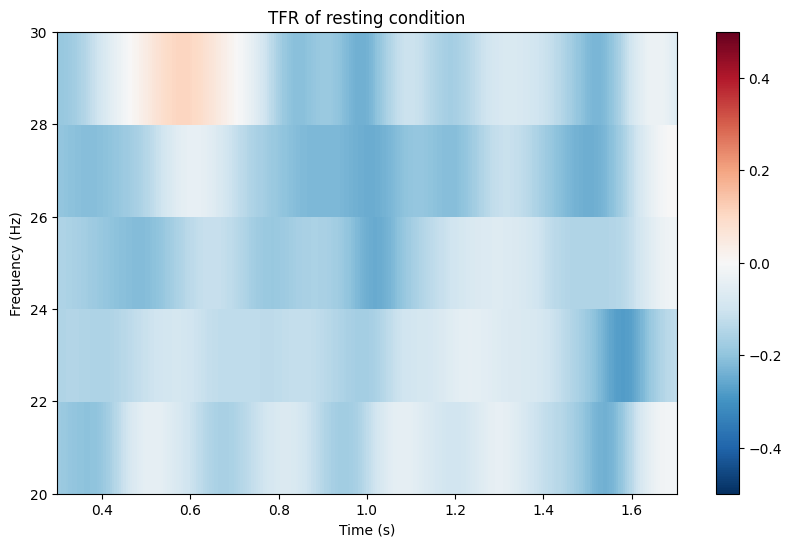

In [17]:
center_channel = "LQ[X]"
idx_channel = all_epochs.ch_names.index(center_channel)

fig, axes = plt.subplots(1, 1, figsize=(10,6))

# Plot the 5 different digits in a subplot horziontally
power.plot(
    [idx_channel],
    mode="logratio",
    baseline=(0, 0.3),
    tmin=0.3,
    tmax=1.7,
    axes=axes,
    show=False,
    vmin=-0.5,
    vmax=0.5,
)
axes.set_title("TFR of resting condition")